## Convolutional Neural Netwrok

### Preferably run it on google colab 

In [1]:
 !unzip autonobot-detection-challenge-0.zip    # unzip the file 

Archive:  autonobot-detection-challenge-0.zip
  inflating: Images/Images/Testing/11327.jpg  
  inflating: Images/Images/Testing/11332.jpg  
  inflating: Images/Images/Testing/11665.jpg  
  inflating: Images/Images/Testing/12607.jpg  
  inflating: Images/Images/Testing/12949.jpg  
  inflating: Images/Images/Testing/14512.jpg  
  inflating: Images/Images/Testing/18772.jpg  
  inflating: Images/Images/Testing/18835.jpg  
  inflating: Images/Images/Testing/19435.jpg  
  inflating: Images/Images/Testing/19590.jpg  
  inflating: Images/Images/Testing/19998.jpg  
  inflating: Images/Images/Testing/20338.jpg  
  inflating: Images/Images/Testing/20443.jpg  
  inflating: Images/Images/Testing/20489.jpg  
  inflating: Images/Images/Testing/20608.jpg  
  inflating: Images/Images/Testing/22697.jpg  
  inflating: Images/Images/Testing/25563.jpg  
  inflating: Images/Images/Testing/25733.jpg  
  inflating: Images/Images/Testing/26768.jpg  
  inflating: Images/Images/Testing/27931.jpg  
  inflating: I

In [0]:
# Setting the seed
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [0]:
import numpy as np
import pandas as pd
from imageio import imread
from skimage.transform import resize
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

train = pd.read_csv('training.csv')
newid = [str(i) for i in train['Id']]

width, height = 512,512

file = os.listdir()

# Loading the training Images
images = [imread('Images/Images/Training/' + j) for j in newid]
resized = [resize(i, (width, height)) for i in images]
images = np.array(resized)


In [0]:
# Loading the testing images
testid=pd.read_csv('sample.csv',usecols=['Id'])
testid = [str(i) for i in testid['Id']]
width, height = 512,512
images_test = [imread('Images/Images/Testing/' + j) for j in testid]
resized_test = [resize(i, (width, height)) for i in images_test]
images_test = np.array(resized_test)

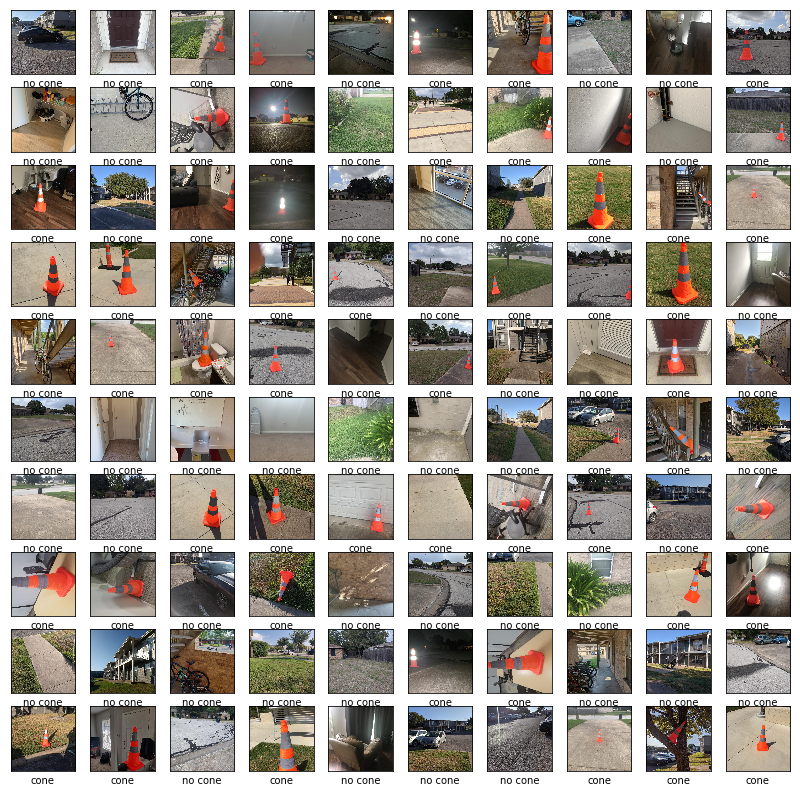

In [40]:
# Plotting a sample of training images with label
train_0 = train[train['Category'] == 0]
train_1 = train[train['Category'] == 1]

train_labels = [0,1]
class_names=['no cone','cone']

plt.figure(figsize=(14,14))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train['Category'].values[i]])
plt.show()

In [42]:
from keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
input_shape = images[0].shape

classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3),input_shape = input_shape,activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3),input_shape = input_shape, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer
classifier.add(Conv2D(64, (3, 3), input_shape = input_shape,activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu',kernel_regularizer=regularizers.l2(0.05)))    # adding a penalty to avoid over-fitting by using l2 reguolarizer
classifier.add(Dense(units = 1, activation = 'sigmoid',kernel_regularizer=regularizers.l2(0.01)))   # sigmoid as our output is either 0 or 1

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(images,train.Category.values, epochs=120, batch_size=32,validation_split=0.1)   # taking 10% of training data as validation set


Train on 344 samples, validate on 39 samples
Epoch 1/120
344/344 [==============================] - 5s 14ms/sample - loss: 12.1606 - acc: 0.5203 - val_loss: 6.0129 - val_acc: 0.5385
Epoch 2/120
344/344 [==============================] - 4s 13ms/sample - loss: 5.0441 - acc: 0.6047 - val_loss: 4.1263 - val_acc: 0.5385
Epoch 3/120
344/344 [==============================] - 4s 13ms/sample - loss: 3.2533 - acc: 0.6715 - val_loss: 2.4019 - val_acc: 0.7436
Epoch 4/120
344/344 [==============================] - 4s 13ms/sample - loss: 1.8915 - acc: 0.7703 - val_loss: 1.4522 - val_acc: 0.5641
Epoch 5/120
344/344 [==============================] - 4s 13ms/sample - loss: 1.1945 - acc: 0.7587 - val_loss: 0.9732 - val_acc: 0.8718
Epoch 6/120
344/344 [==============================] - 4s 13ms/sample - loss: 0.8032 - acc: 0.8285 - val_loss: 0.7729 - val_acc: 0.6667
Epoch 7/120
344/344 [==============================] - 4s 13ms/sample - loss: 0.6935 - acc: 0.8169 - val_loss: 0.6387 - val_acc: 0.8974
Ep

(<tensorflow.python.keras.callbacks.History at 0x7f7cae452e10>,)

In [0]:
# Predicting the label for test images 
result = classifier.predict(images_test)

In [0]:
# Converting the label dtype and using round function to get label as 0 or 1
result=np.round(result).astype('int64')

In [0]:
df_sub=pd.DataFrame(testid,columns=['Id'])
df_sub['Category']=result

In [46]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 2 columns):
Id          98 non-null object
Category    98 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [0]:
df_sub.to_csv('submission.csv',index=False)    # Exporting the submission file 

### Saving the model to replicate results 

In [0]:
# saving the model
classifier.save('autonobot_trial_model_er_8.h5')  # can reload the model and run to replicate the results

In [51]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 510, 510, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 255, 255, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 253, 253, 32)      4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 246016)           

In [61]:
# Reloading the model 
import tensorflow as tf 
new_model=tf.keras.models.load_model('autonobot_trial_model_er_8.h5')


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [65]:
new_model.optimizer   # same as our aforementioned model's optimizer

In [0]:
#result2 = new_model.predict(images_test)    # code to replicate the results